In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
%matplotlib inline

from sympy.solvers import solve
from sympy import Symbol

In [2]:
def resident(x, t):
    lamda = (beta1*(x[1]+x[2]))
    sdot = rho - mu*x[0] - sigmaS*lamda*x[0]
    i1dot = sigmaS*lamda*x[0] - (mu+alpha1+(sigmaI*lamda))*x[1]
    d11dot = sigmaI*lamda*x[1] - (mu+alpha1)*x[2]
    return sdot,i1dot,d11dot

In [3]:
def mutant(x, t):
    imdot = (betaM*x[0]+betaM1*x[1])*Seq - (beta1*I1eq+beta1M*x[1])*x[0] - (mu+alphaM)*x[0]
    d1mdot = (beta1*I1eq+beta1M*x[1])*x[0] + (betaM*x[0]+betaM1*x[1])*I1eq - (mu+alpha1M)*x[1]
    return imdot, d1mdot

In [4]:
rho = 0.02                           # host input function
mu = 0.02                            # basline mortality rate
sigmaS = 1                           # vulnerability of suscpetible hosts to infection
sigmaI = 5                           # vulnerability of infected hosts to infection
alpha1 = 0.03                        # virulence of a host infected by 1
beta1 = 0.4                          # transmission rate of strain 1 in single infection
#betaM = 0.75                         # transmission rate of mutant in single infection
#betaM1 = 0.9                         # transmission rate of mutant strain in a host co-infected by M&1
#beta1M = 0.9                         # transmission rate of strain 1 in a host co-infected by 1&M
#alphaM = 0.09                        # virulence of host infected by mutant
#alpha1M = 0.12                       # virulence of host coinfected by 1&M

In [5]:
tmax1 = 1000
tmax2 = 2000
ts1 = np.linspace(0,100,tmax1)
ts2 = np.linspace(0,200,tmax2)

In [6]:
betaM = 0.75                         # transmission rate of mutant in single infection
betaM1 = betaM                       # transmission rate of mutant strain in a host co-infected by M&1
beta1M = betaM1                      # transmission rate of strain 1 in a host co-infected by 1&M

In [7]:
alphaM = 0.09                        # virulence of host infected by mutant
alpha1M = alphaM                     # virulence of host coinfected by 1&M

In [8]:
x0 = [0.8,0.5,0.05]
xs = odeint(resident,x0,ts2)
Ss = xs[:,0]
I1s = xs[:,1]
D11s = xs[:,2]

In [29]:
x0 = [0.25,0.00005]

Seq = Ss[999]
I1eq = I1s[999]

xs = odeint(mutant,x0,ts1)

Ims = xs[:,0]
D1ms = xs[:,1]

In [30]:
ImsP = np.zeros(2000)
D1msP = np.zeros(2000)

for i in range (1000,2000):
    ImsP[i] = Ims[i-1000]
    D1msP[i] = D1ms[i-1000]

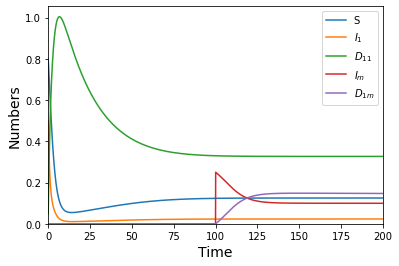

In [31]:
# Time Course
plt.plot(ts2,Ss)
plt.plot(ts2,I1s)
plt.plot(ts2,D11s)
plt.plot(ts2,ImsP)
plt.plot(ts2,D1msP)
plt.xlabel('Time', fontsize=14)
plt.ylabel('Numbers', fontsize=14)
plt.xlim((0,200))
plt.ylim((0))
plt.legend(['S', r'$I_1$', r'$D_{11}$', r'$I_m$', r'$D_{1m}$'], loc='upper right')
plt.show()

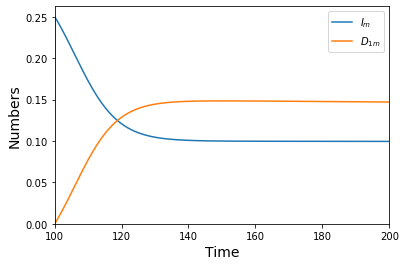

In [33]:
# Time Course
#plt.plot(ts2,Ss)
#plt.plot(ts2,I1s)
#plt.plot(ts2,D11s)
plt.plot(ts2,ImsP)
plt.plot(ts2,D1msP)
plt.xlabel('Time', fontsize=14)
plt.ylabel('Numbers', fontsize=14)
plt.xlim((100,200))
plt.ylim((0))
plt.legend([r'$I_m$', r'$D_{1m}$'], loc='upper right')
plt.show()